In [33]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [35]:
#Read stock info from Google Finiance or Yahoo Finiance 

from pandas.io.data import DataReader


In [36]:
from datetime import datetime

In [37]:
# solving floting issues 

from __future__ import division 

In [38]:
my_list=['KO','SBUX','AAPL']

In [75]:
end =datetime.now()
start=datetime(end.year-5,end.month,end.day)

In [76]:
#globals take a string as a global varilble. 

for stock in my_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [77]:
SBUX.head(4)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-04-18,35.820000,35.880001,35.000000,35.810001,11133400,16.697673
2011-04-19,35.820000,36.290001,35.730000,36.160000,10574400,16.860872
2011-04-20,36.549999,37.000000,36.529999,36.889999,13098800,17.201260
2011-04-21,36.709999,37.240002,36.669998,37.000000,12950400,17.252551


In [78]:
# Summary Stats

KO.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000
mean,48.398162,48.704916,48.100191,48.416380,1.537074e+07,36.376570
std,13.395715,13.481851,13.310936,13.407902,6.414814e+06,4.299050
min,35.880001,36.279999,35.580002,35.970001,3.036600e+06,27.798651
25%,39.700001,39.980000,39.439999,39.680000,1.136480e+07,33.548383
50%,41.520000,41.790001,41.330002,41.580002,1.394540e+07,36.951045
75%,65.519997,66.099998,65.070000,65.529999,1.757560e+07,39.596783
max,81.010002,81.330002,80.620003,81.120003,9.896750e+07,46.889999


In [79]:
#general Info
SBUX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2011-04-18 to 2016-04-15
Data columns (total 6 columns):
Open         1257 non-null float64
High         1257 non-null float64
Low          1257 non-null float64
Close        1257 non-null float64
Volume       1257 non-null int64
Adj Close    1257 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


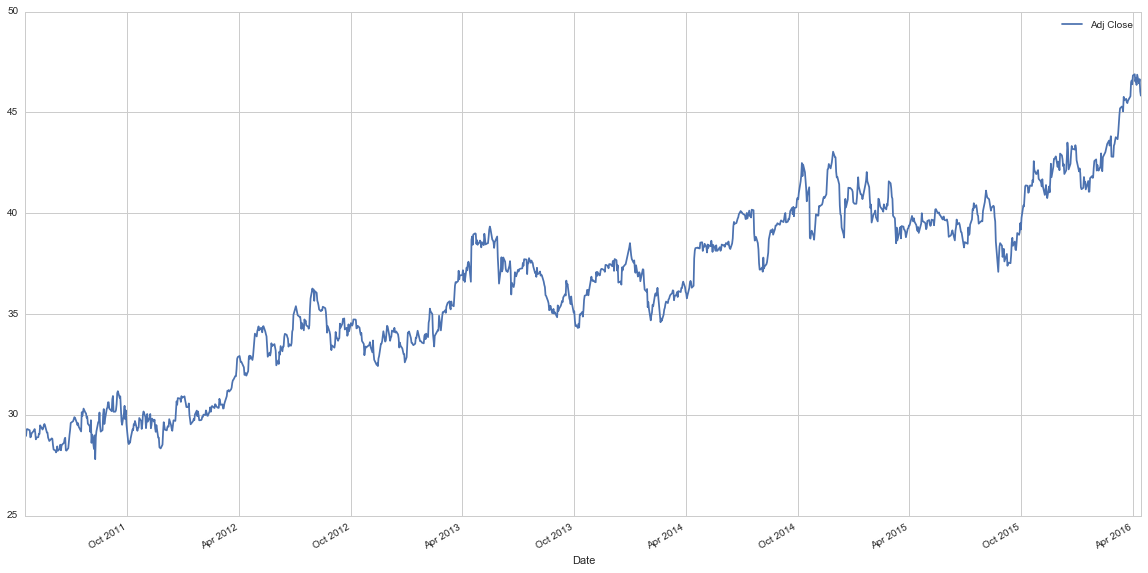

In [80]:
KO['Adj Close'].plot(legend=True,figsize=(20,10))

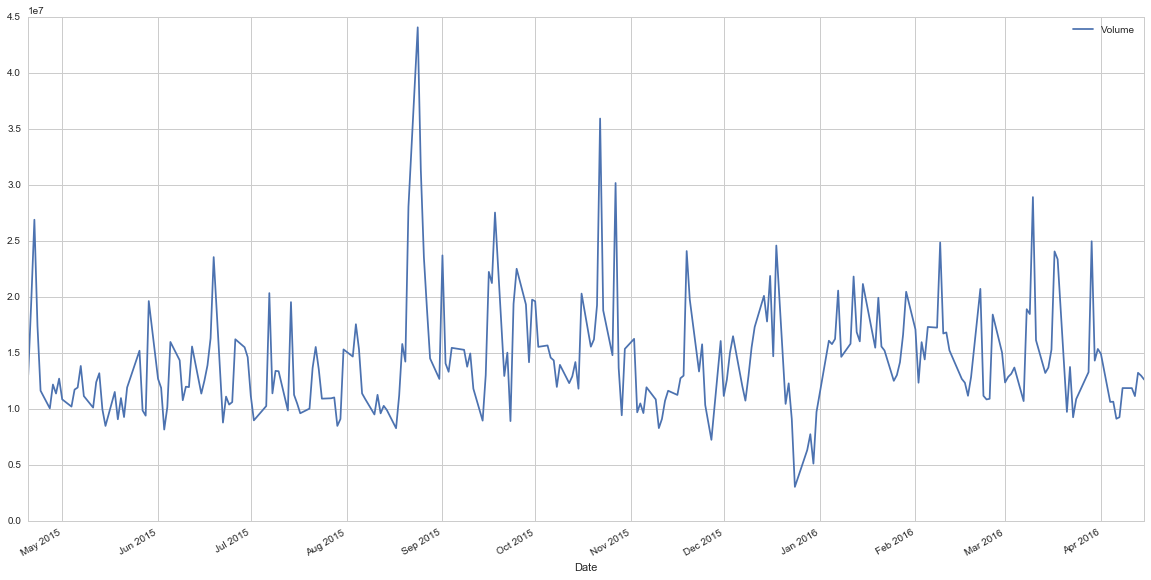

In [45]:
KO['Volume'].plot(legend=True,figsize=(20,10))

In [46]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name= "MA for %s days" %(str(ma))
    SBUX[column_name]=pd.rolling_mean(SBUX['Adj Close'],ma)

/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [47]:
KO[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10))

KeyError: "['MA for 10 days' 'MA for 20 days' 'MA for 50 days'] not in index"

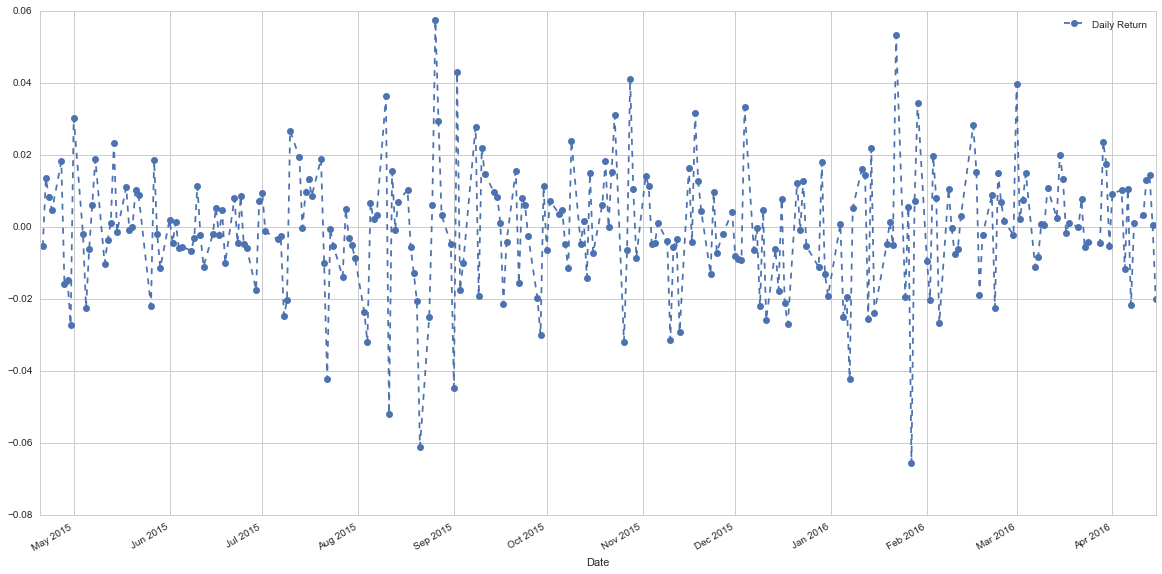

In [48]:
KO['Daily Return']=AAPL['Adj Close'].pct_change()

KO['Daily Return'].plot(figsize=(20,10),legend=True,linestyle='--',marker='o')

In [49]:
KO

,Open,High,Low,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2015-04-20,40.419998,40.900002,40.410000,40.660000,13023700,39.369609,NaN
2015-04-21,40.669998,40.990002,40.540001,40.779999,19673100,39.485799,-0.005407
2015-04-22,41.560001,41.570000,41.070000,41.310001,26887200,39.998982,0.013474
2015-04-23,41.230000,41.410000,40.919998,40.950001,17408800,39.650406,0.008164
2015-04-24,41.040001,41.119999,40.810001,40.889999,11623300,39.592309,0.004704
2015-04-27,41.000000,41.150002,40.779999,40.830002,10044600,39.534215,0.018192
2015-04-28,40.950001,40.970001,40.599998,40.770000,12174800,39.476118,-0.015756
2015-04-29,40.660000,40.750000,40.400002,40.490002,11371400,39.205005,-0.014706
2015-04-30,40.400002,40.580002,40.279999,40.560001,12700800,39.272784,-0.027130


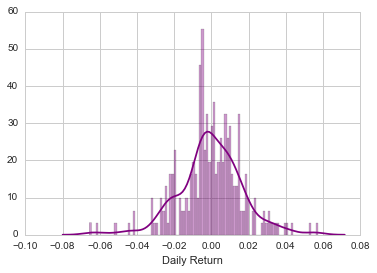

In [51]:
sns.distplot(KO['Daily Return'].dropna(),bins=100,color='purple')

In [52]:
closing_df=DataReader(my_list,'yahoo',start,end)['Adj Close']

In [53]:
closing_df.head()

,AAPL,KO,SBUX
Date,,,
2015-04-20,125.277689,39.369609,47.377656
2015-04-21,124.600252,39.485799,47.772715
2015-04-22,126.279121,39.998982,47.743086
2015-04-23,127.310014,39.650406,48.819627
2015-04-24,127.908913,39.592309,51.199868


In [54]:
list_rets=closing_df.pct_change()

In [55]:
list_rets.head()

,AAPL,KO,SBUX
Date,,,
2015-04-20,NaN,NaN,NaN
2015-04-21,-0.005407,0.002951,0.008339
2015-04-22,0.013474,0.012997,-0.000620
2015-04-23,0.008164,-0.008715,0.022549
2015-04-24,0.004704,-0.001465,0.048756


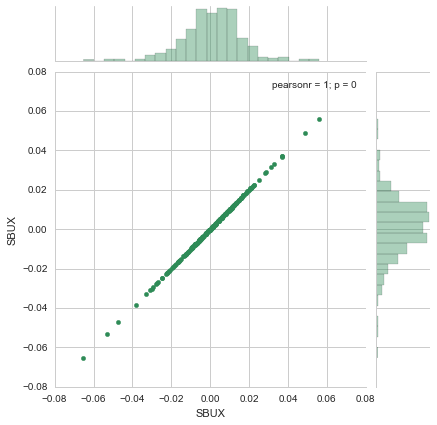

In [56]:
sns.jointplot('SBUX','SBUX',list_rets,kind='scatter',color='seagreen')

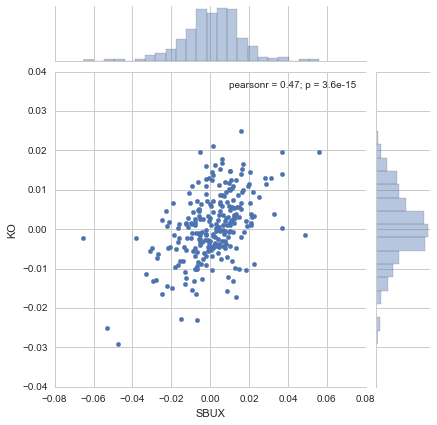

In [58]:
sns.jointplot('SBUX','KO',list_rets,kind='scatter')

In [59]:
list_rets.head()

,AAPL,KO,SBUX
Date,,,
2015-04-20,NaN,NaN,NaN
2015-04-21,-0.005407,0.002951,0.008339
2015-04-22,0.013474,0.012997,-0.000620
2015-04-23,0.008164,-0.008715,0.022549
2015-04-24,0.004704,-0.001465,0.048756


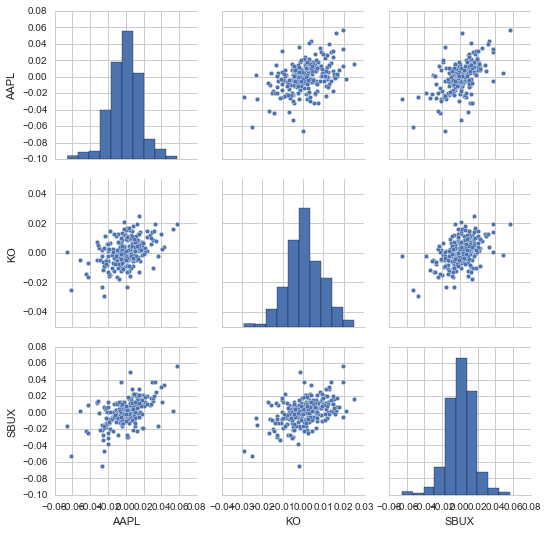

In [60]:
sns.pairplot(list_rets.dropna())

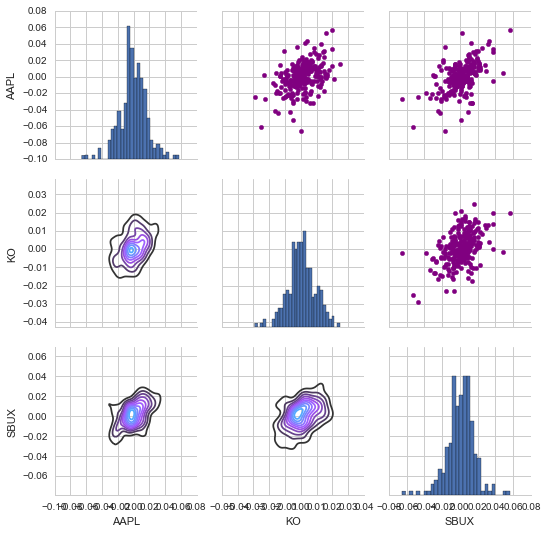

In [61]:
returns_fig=sns.PairGrid(list_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

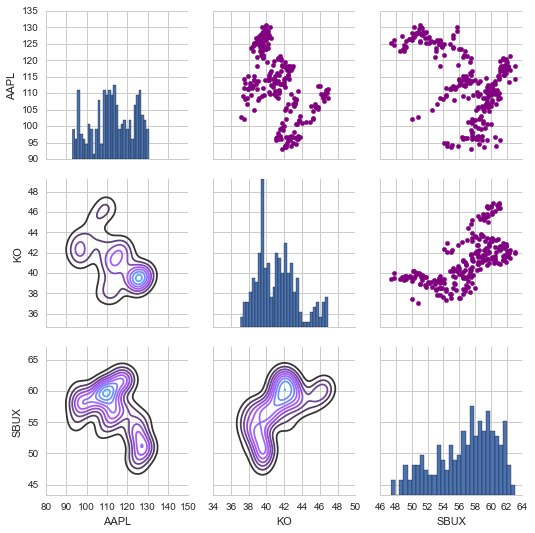

In [62]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/xikaizhao/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


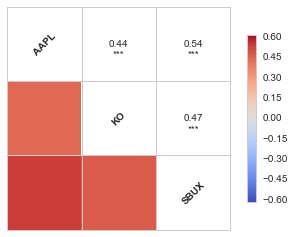

In [63]:
sns.corrplot(list_rets.dropna(),annot=True)

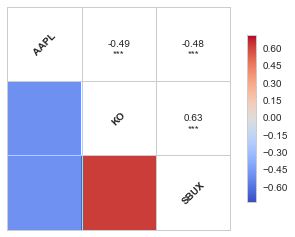

In [64]:
sns.corrplot(closing_df,annot=True)

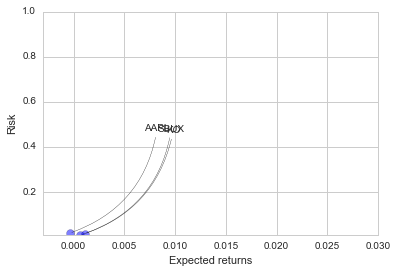

In [65]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = list_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,1])
plt.xlim([-0.003,0.03])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 100),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


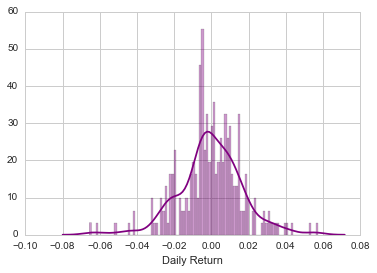

In [67]:
sns.distplot(KO['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
#95%confidence, the worst daily loss will not exceed 0.026*1,000,000=$26000 
#with assumption that we had 1 million dollar investment.

rets['SBUX'].quantile(0.01)

In [68]:
days = 365 

dt=1/days

mu=rets.mean()['KO']

sigma=rets.std()['KO']



In [69]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [ ]:
1

In [71]:
start_price=39.11

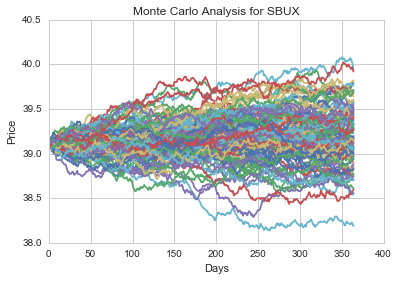

In [72]:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis for SBUX')

In [73]:
runs = 10000
simulations=np.zeros(runs)

for run in xrange(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

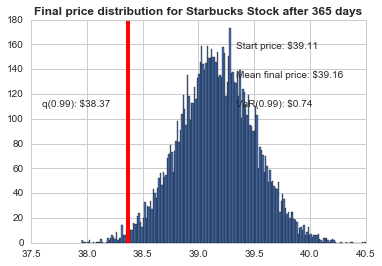

In [74]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Starbucks Stock after %s days" % days, weight='bold');